# Notebook 7 - Clasificador Semi-Supervisado



## 1. Clasificando números escritos a mano (MNIST Dataset).

El primer día del curso les hice la pregunta: ¿Cómo programarían un clasificador de dígitos, que para una imagen donde aparece un número escrito a mano, reconozca cuál es el dígito (de 0 a 9)?

Bueno, pues hoy vamos a aplicar todas las herramientas aprendidas durante estas semanas para intentar resolver este problema. Trabajaremos sobre el conocidísimo dataset MNIST (https://en.wikipedia.org/wiki/MNIST_database). Este dataset contiene 5620 muestras de imagenes de 8x8 píxeles (64 píxeles), que nosotros trataremos como variables independientes. Es decir, trabajaremos con un dataset de dimensiones 5620x64. Cada una de las variables de entrada contiene un valor entero que varía de 0 a 16 indicando la intensidad en escala de grises del pixel correspondiente.

> > > ![texto alternativo](https://learnmachinelearning.files.wordpress.com/2017/08/mnist.png)

De la misma forma tenemos un vector de salida $Y$ que contiene el dígito identificado en cada una de las clases. Pero... ¿Podemos intentar hacer un clasificador que no haga uso de todas estas etiquetas? ¡Vamos a verlo!

---

**Tu tarea:**

1. Utiliza las herramientas de análisis exploratorio que ya conocemos para responder a las siguientes preguntas:

> 1.   ¿Están las clases a predecir balanceadas? ¿En qué  puede afectar esto a la calidad del análisis? ¿Tiene solución?
> 2.   ¿Son comparables los rangos de valores de cada variable? ¿En qué  puede afectar esto a la calidad del análisis? ¿Tiene solución?
> 3.   ¿Existe correlación entre las variables? ¿En qué  puede afectar esto a la calidad del análisis? ¿Tiene solución?
> 4.   ¿Podemos reducir el número de variables? ¿En qué puede afectar esto a la calidad del análisis? ¿Tiene solución?

> > **Aplica la solución donde creas conveniente.**

2.  Ahora imaginemos que queremos crear nuestro clasificador, pero que no contamos con los recursos económicos suficientes para etiquetar nuestros datos (vamos a asumir que no contamos con el vector $Y$), y por tanto no podemos gastar tanto dinero en etiquetar cada punto. ¿Qué hacemos? Vamos a probar a hacer un análisis semi-supervisado.

> 1.   Utiliza el algoritmo de clusterización K-means (feel free para usar Sklearn) para ver si puede identificar *clusters* dentro de tus datos (esto es análisis no supervisado, y solo trabajamos con nuestros datos de entrada). Utiliza el método adecuado para encontrar el número de clusters ***k*** óptimo.
> 2.  Una vez hayas encontrado tus *clusters*, "gasta" recursos para etiquetar 50 valores aleatorios de tu dataset. Es decir, selecciona aletoriamente 50 puntos de tu conjunto de datos y comprueba su etiqueta en el vector $Y$.
> 3.  Utiliza estas 50 etiquetas (si te fijas es menos del 1% del tamaño original del dataset) para ver cuál es la etiqueta más frecuente en cada uno de los clusters identificados en el primer apartado, y asigna a todos los elementos del cluster la etiqueta más frecuente.
> 4. Finalmente evalua la calidad de tus predicciones con los puntos que no hayas seleccionado (es decir, los $n - 50$ elementos restantes en $Y$) y comprueba cuál ha sido la tasa de acierto del modelo. Puedes incluir estos 4 pasos dentro de un bucle que los repita varias veces y calcule la media de esta métrica para reducir los efectos de la aleatoriedad al seleccionar los 50 puntos.

> > ¿Qué tal ha sido el rendimiento de nuestro modelo semi-supervisado?

> 5. (**Bonus**) Comprueba cuál sería el rendimiento real de nuestro modelo si lo hubieramos entrenado de forma supervisada con todos nuestros datos (teniendo en cuenta el dejar un conjunto de prueba para evaluar que no existe *overfitting*). Prueba con los diferentes modelos que hemos estudiado: *Regresión Lineal Múltiple y Polinomial*, *Regresión Logística*, *KNN*.

> > ¿Mejora mucho el rendimiento?

**Pista:** Ten en cuenta que si en algún momento quisieras visualizar el contenido de una imagen, tendrás que tomar la fila que contenga las 64 variables de entrada y hacer un reshape de tus variables a las dimensiones 8x8:


``` 
# Redimensionamos y visualizamos.
plt.matshow(X[0,:].reshape(8,8)) 
```




In [0]:
import numpy as np
import scipy as sc
import sklearn as sk
import matplotlib.pyplot as plt
import pandas  as pd

from sklearn.datasets import load_digits

# mnist = load_digits()

mnist = pd.read_csv('sample_data/mnist_train_small.csv', header=None)

print(mnist.shape)


(20000, 785)


In [0]:
X = np.matrix(mnist.iloc[:,1:785])
Y = np.array(mnist.iloc[:,0]).reshape(20000, 1)

# X = sk.preprocessing.scale(X, with_mean=True, with_std=True)

del mnist

print(X.shape, Y.shape)

(20000, 784) (20000, 1)


(1, 784)


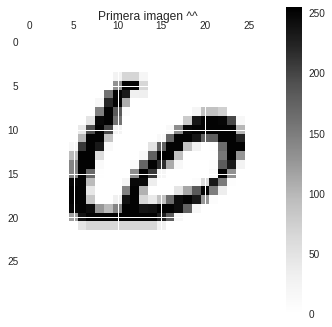

In [0]:

img0 = X[0] # Seleccionamos la primera imagen.
print(img0.shape)

# Redimensionamos y visualizamos la imagen.
plt.matshow(img0.reshape(28, 28))
plt.title("Primera imagen ^^")
plt.colorbar()
plt.show()

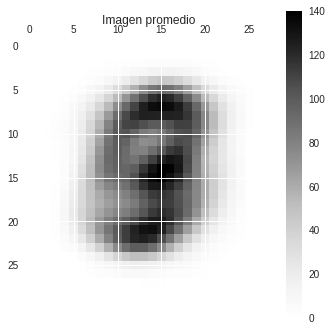

In [0]:
# Redimensionamos y visualizamos la imagen.
plt.matshow(np.mean(X, axis=0).reshape(28, 28))
plt.title("Imagen promedio")
plt.colorbar()
plt.show()

## Analisis exploratorio

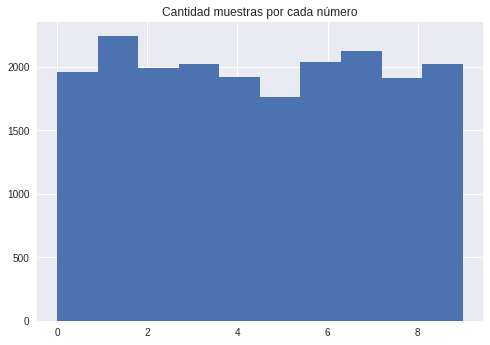

0 : 1962
1 : 2243
2 : 1989
3 : 2021
4 : 1924
5 : 1761
6 : 2039
7 : 2126
8 : 1912
9 : 2023


''

In [0]:
plt.title("Cantidad muestras por cada número")
plt.hist(Y)
plt.show()

[ print(i,':', n) for i, n in enumerate(np.bincount(Y.flatten()))]

""

Pues las clases están balanceadas

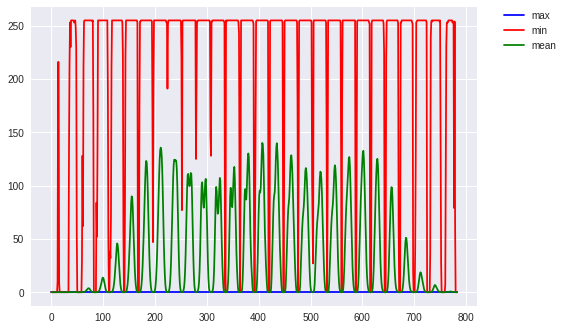

In [0]:
mins = X.min(axis=0).reshape(784,1)
maxs = X.max(axis=0).reshape(784,1)
means = X.mean(axis=0).reshape(784,1)

plt.plot(np.arange(0,784), mins, c='blue', label='max')
plt.plot(np.arange(0,784), maxs, c='red', label='min')
plt.plot(np.arange(0,784), means, c='green', label='mean')

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

plt.show()

Generalmente los valores varian entre 0 y 255, excepto en algunos valores, posiblemente en los bordes de las muestras. 
Como estos valores no serán necesarios para clasificar no será necesario  cambiar los rangos de las variables, excepto para reducir el espacio de 0 a 255 a 0 a 1.


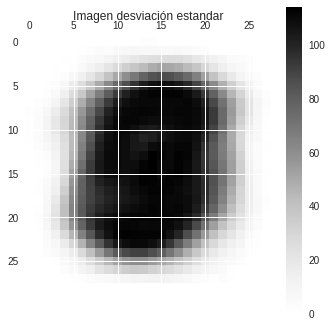

In [0]:
# Redimensionamos y visualizamos la imagen.
plt.matshow(np.std(X, axis=0).reshape(28, 28))
plt.title("Imagen desviación estandar")
plt.colorbar()
plt.show()

/usr/local/lib/python3.6/dist-packages/numpy/lib/function_base.py:3183: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/usr/local/lib/python3.6/dist-packages/numpy/lib/function_base.py:3184: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]


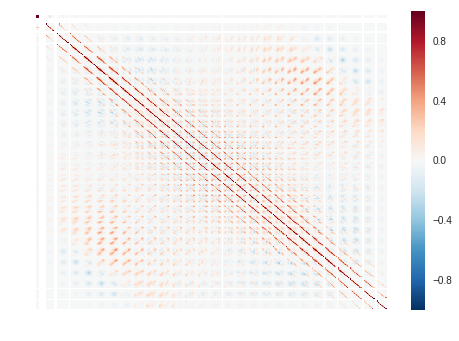

In [0]:
import seaborn as sb
from sklearn.preprocessing  import scale

corr_Matrix = np.corrcoef(X, rowvar=False)
sb.heatmap(corr_Matrix, vmin = -1, vmax = 1, cmap='RdBu_r')
plt.axis('off')
plt.show()

In [0]:
del corr_Matrix # Google no me eches

In [0]:
from sklearn.decomposition import PCA

# pca_components = .5
pca_components = .99

pca = PCA(n_components=pca_components)
pca.fit(X)


PCA(copy=True, iterated_power='auto', n_components=0.99, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

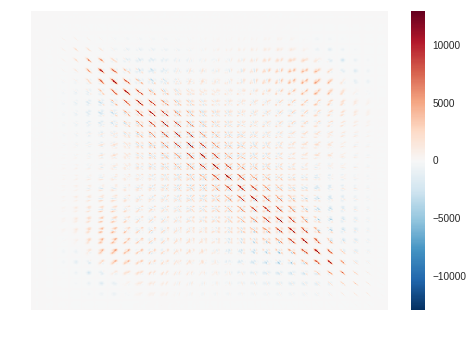

"sb.heatmap(np.cov(X), cmap='RdBu_r') #Nop\nplt.axis('off')\nplt.show()"

In [0]:
sb.heatmap(pca.get_covariance(), cmap='RdBu_r')
plt.axis('off')
plt.show()

'''sb.heatmap(np.cov(X), cmap='RdBu_r') #Nop
plt.axis('off')
plt.show()'''

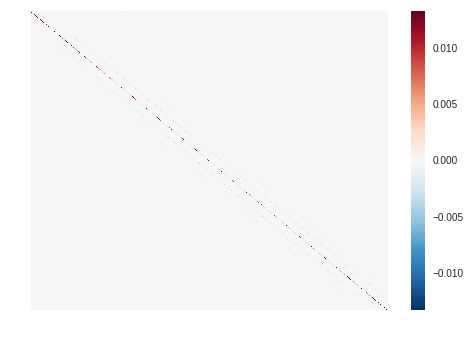

In [0]:
sb.heatmap(pca.get_precision(), cmap='RdBu_r')
plt.axis('off')
plt.show()

In [0]:
'''print('Ratio de varianza', pca.explained_variance_ratio_) 
print('singular_values_ ?', pca.singular_values_)  '''

Xpca = pca.fit_transform(X)

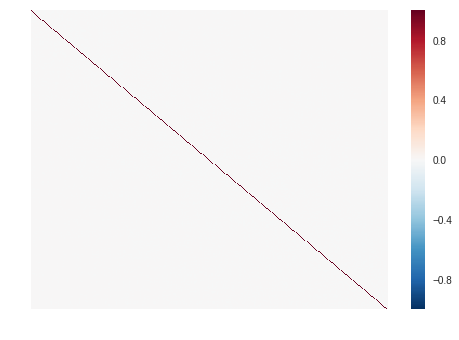

In [0]:
corr_Matrix = np.corrcoef(Xpca, rowvar=False)
sb.heatmap(corr_Matrix, vmin = -1, vmax = 1, cmap='RdBu_r')
plt.axis('off')
plt.show()

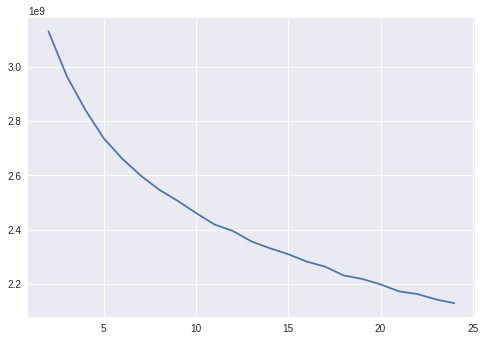

In [0]:
from scipy.spatial.distance import cdist
from sklearn.cluster import KMeans

max_k = 25
min_k = 2

def test_kmeans(clusters, X_sub):

  kmeans = KMeans(n_clusters=clusters).fit(X_sub)
  centr = kmeans.cluster_centers_
  predY = kmeans.predict(X_sub).astype(int)
  
  return np.sum([ np.sum( cdist([centr[k]], X_sub[predY == k], 'sqeuclidean') ) for k in range(clusters)])

  
X_sub = Xpca[np.random.randint(len(Xpca), size=1000)]
e = [test_kmeans(i, X_sub) for i in range(min_k, max_k)]
plt.plot(np.arange(min_k, max_k), e)

plt.show()

In [0]:
from sklearn.model_selection import train_test_split

N_Test = 2000

test50X, testX, test50Y, testY = train_test_split(Xpca, Y, train_size=N_Test, test_size=len(X)-N_Test, shuffle=True)

kmeans = KMeans(n_clusters=10).fit(test50X)
pred50Y = kmeans.predict(test50X).reshape(N_Test, 1)


NameError: ignored

In [0]:

print("valor más habitual de los clusters", [np.argmax(np.bincount(test50Y[pred50Y == i])) for i in range(10)]) # : S

real_class = np.zeros(10).astype(int)
remaining_centroids = [0,1,2,3,4,5,6,7,8,9]

for number in range(10):
  
  p = []
  
  for centroid in remaining_centroids:
    
    real_results = test50Y[pred50Y == centroid]
    corrects_count = len(real_results[real_results == number])
    
    p.append( corrects_count / len(real_results) )
    
  # print(len(p), p)
  
  n = np.argmax(p)
  
  # print(remaining_centroids[n], n)
  
  real_class[remaining_centroids[n]] = int(number)

  remaining_centroids.pop(n)
  

real_class

valor más habitual de los clusters [7, 7, 4, 1, 0, 1, 3, 6, 6, 2]


array([7, 8, 4, 1, 0, 9, 3, 6, 5, 2])

Aciertos, 43.05 %
[[9, 5], [8, 7], [9, 1], [3, 3], [3, 5], [2, 2], [3, 5], [7, 9], [5, 6], [4, 4], [2, 2], [4, 9], [2, 2], [8, 4], [2, 2], [9, 3], [9, 1], [8, 7], [5, 2], [8, 9], [1, 1], [8, 7], [9, 8], [2, 2], [8, 4], [5, 0], [5, 3], [1, 8], [7, 4], [4, 4], [7, 9], [9, 1], [7, 7], [4, 4], [8, 4], [7, 7], [7, 4], [7, 7], [5, 6], [7, 7], [1, 5], [8, 8], [7, 9], [8, 8], [4, 4], [6, 6], [0, 0], [1, 1], [7, 9], [2, 2], [6, 6], [3, 2], [3, 6], [9, 2], [5, 6], [9, 3], [5, 6], [7, 4], [5, 6], [3, 3], [8, 7], [5, 6], [4, 4], [2, 6], [5, 0], [6, 6], [2, 2], [8, 7], [8, 4], [5, 6], [2, 2], [6, 6], [8, 7], [6, 6], [7, 7], [3, 8], [9, 1], [1, 1], [2, 2], [8, 9], [4, 4], [9, 2], [3, 3], [9, 8], [5, 8], [4, 8], [7, 9], [9, 1], [6, 8], [8, 5], [8, 7], [9, 5], [8, 8], [7, 8], [3, 8], [6, 6], [8, 7], [3, 3], [8, 8], [8, 7], [9, 6], [5, 6], [3, 8], [6, 6], [9, 6], [5, 8], [1, 1], [0, 0], [4, 4], [4, 7], [7, 3], [7, 9], [4, 4], [7, 7], [8, 7], [1, 1], [9, 1], [2, 2], [2, 8], [8, 9], [8, 5], [0, 0], [9, 3

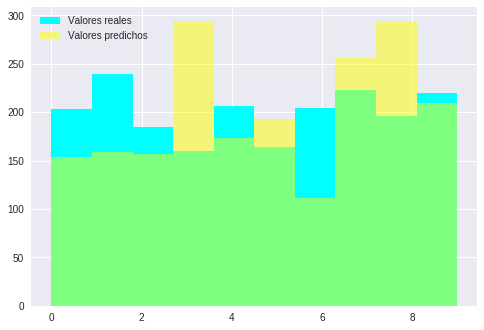

In [0]:
# See matches
matches = [[real_class[x], y[0]] for x, y in zip(pred50Y.ravel(), test50Y)]
print("Aciertos,", np.sum([x[0] == x[1] for x in matches]) / len(matches) * 100.0, '%')
print(matches)

plt.hist(test50Y, color='cyan', label='Valores reales')
plt.hist(np.matrix(matches)[:,0], color='yellow', label='Valores predichos', alpha=.5)
plt.legend()
plt.show()

In [0]:
predY = kmeans.predict(testX).reshape(len(testX), 1)
matches = [[real_class[x], y[0]] for x, y in zip(predY.ravel(), testY)]
print("Aciertos,", np.sum([x[0] == x[1] for x in matches]) / len(matches) * 100.0, '%')

Aciertos, 45.016666666666666 %


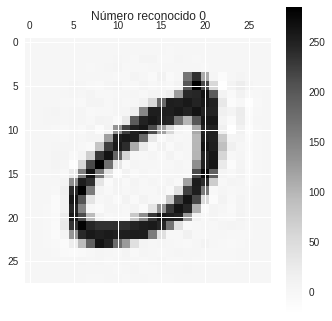

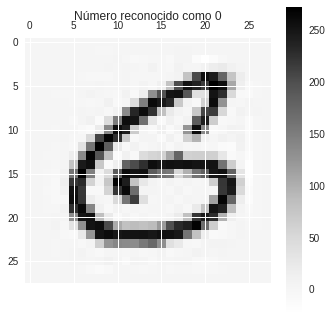

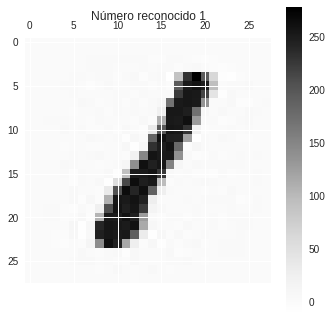

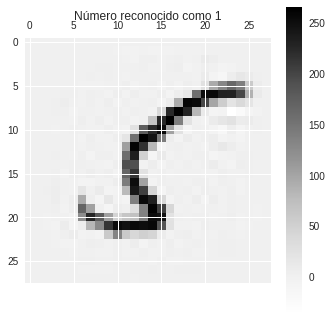

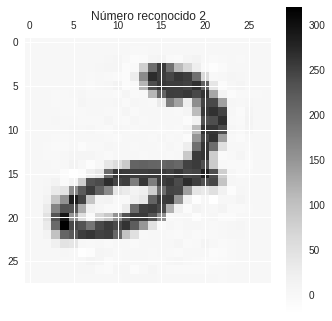

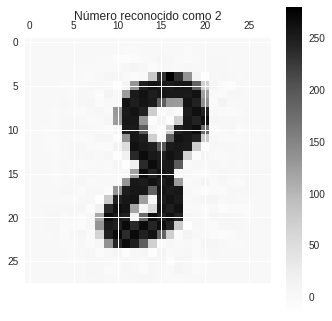

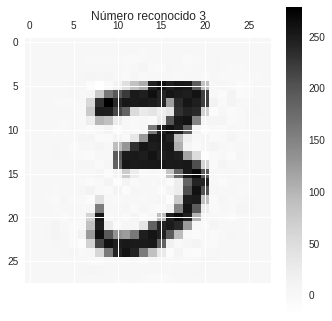

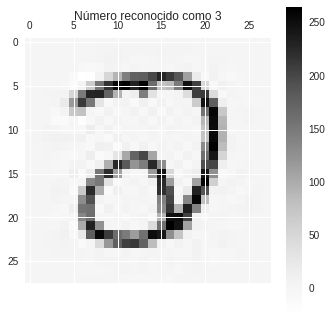

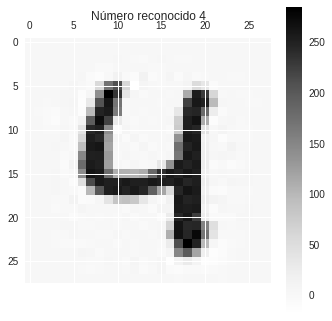

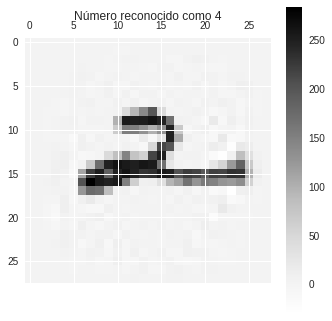

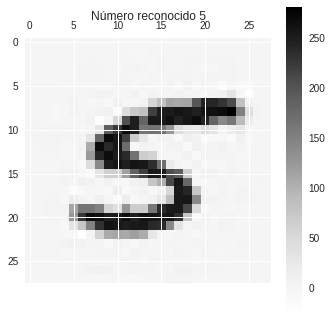

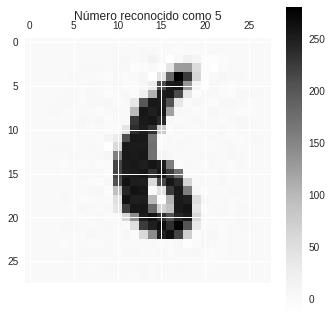

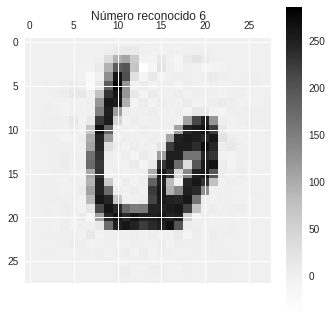

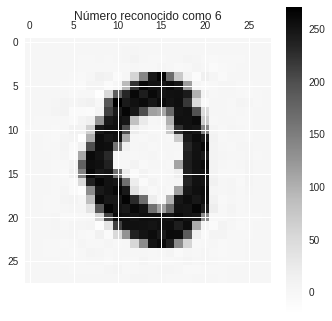

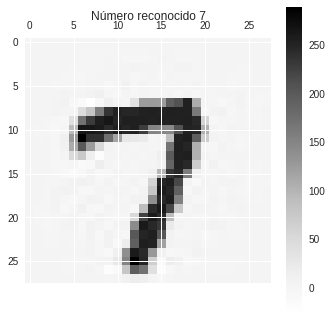

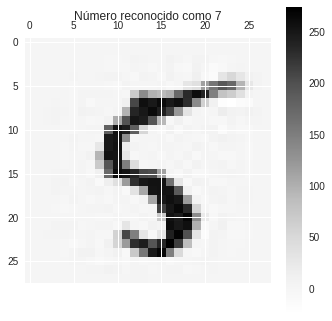

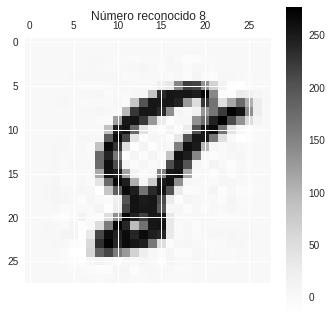

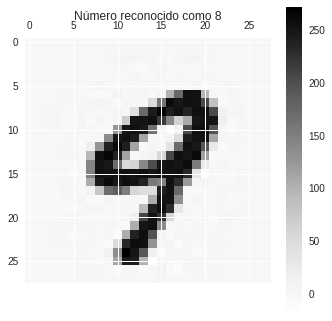

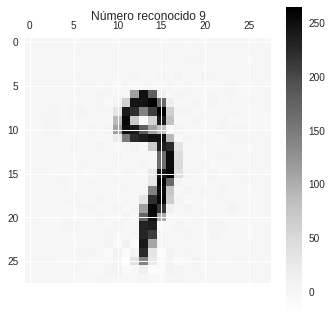

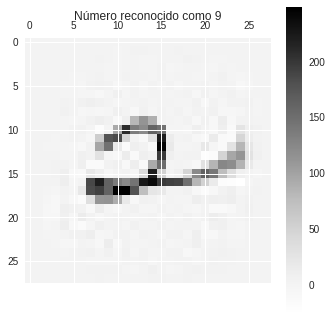

In [0]:
from numpy.random import randint

matches = np.matrix(matches)

for i in range(10):
  
  mask = np.array(matches[:,0] == i).ravel()
  
  imgY = matches[mask]
  imgX = testX[mask]
  
  def print_img(img, title):
    img = pca.inverse_transform(img)

    # Redimensionamos y visualizamos la imagen.
    plt.matshow(img.reshape(28, 28))
    plt.colorbar()
    plt.title(title)
    plt.show()
    
  correct_mask = np.array(imgY[:,0] == imgY[:,1]).ravel()
  correct = imgX[correct_mask]
  bad = imgX[~correct_mask]
    
  img_ok = correct[randint(len(correct))]
  img_bad = bad[randint(len(bad))]
  
 
  print_img(img_ok, 'Número reconocido ' + str(i))
  print_img(img_bad, 'Número reconocido como ' + str(i))